## Import libraries and set up environment

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
pd.set_option('display.max_columns', None)

### Import data

In [2]:
files_to_import = ['survey_results_public_2017.csv']
df = pd.concat(map(pd.read_csv, files_to_import))
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

### Some starting data exploration

In [3]:
df.shape

(51392, 154)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [5]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [6]:
set(df.columns)

{'AnnoyingUI',
 'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'AuditoryEnvironment',
 'BoringDetails',
 'BuildingThings',
 'CareerSatisfaction',
 'ChallengeMyself',
 'ChangeWorld',
 'CheckInCode',
 'ClickyKeys',
 'CollaborateRemote',
 'CompanySize',
 'CompanyType',
 'CompetePeers',
 'Country',
 'CousinEducation',
 'Currency',
 'DeveloperType',
 'DifficultCommunication',
 'DiversityImportant',
 'EducationImportant',
 'EducationTypes',
 'EmploymentStatus',
 'EnjoyDebugging',
 'EquipmentSatisfiedCPU',
 'EquipmentSatisfiedMonitors',
 'EquipmentSatisfiedRAM',
 'EquipmentSatisfiedRW',
 'EquipmentSatisfiedStorage',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'Ex

In [7]:
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'Country',
 'EmploymentStatus',
 'FormalEducation',
 'Professional',
 'ProgramHobby',
 'Respondent',
 'University'}

In [8]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.55])
most_missing_cols

{'AssessJobCommute',
 'AssessJobCompensation',
 'AssessJobDept',
 'AssessJobDiversity',
 'AssessJobExp',
 'AssessJobFinances',
 'AssessJobIndustry',
 'AssessJobLeaders',
 'AssessJobOffice',
 'AssessJobProduct',
 'AssessJobProfDevel',
 'AssessJobProjects',
 'AssessJobRemote',
 'AssessJobRole',
 'AssessJobTech',
 'Currency',
 'ExCoder10Years',
 'ExCoderActive',
 'ExCoderBalance',
 'ExCoderBelonged',
 'ExCoderNotForMe',
 'ExCoderReturn',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExpectedSalary',
 'HaveWorkedFramework',
 'HoursPerWeek',
 'InfluenceCloud',
 'InfluenceCommunication',
 'InfluenceConsultants',
 'InfluenceDatabase',
 'InfluenceDeptTech',
 'InfluenceHardware',
 'InfluenceRecruitment',
 'InfluenceServers',
 'InfluenceTechStack',
 'InfluenceVizTools',
 'InfluenceWorkstation',
 'MobileDeveloperType',
 'NonDeveloperType',
 'Overpaid',
 'ResumePrompted',
 'Salary',
 'TimeAfterBootcamp',
 'WebDeveloperType',
 'YearsCodedJobPast'}

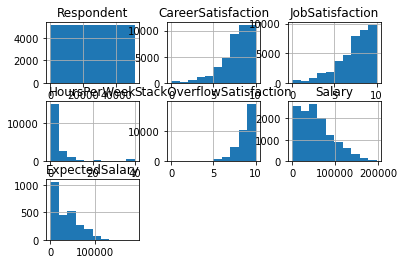

In [9]:
df.hist();

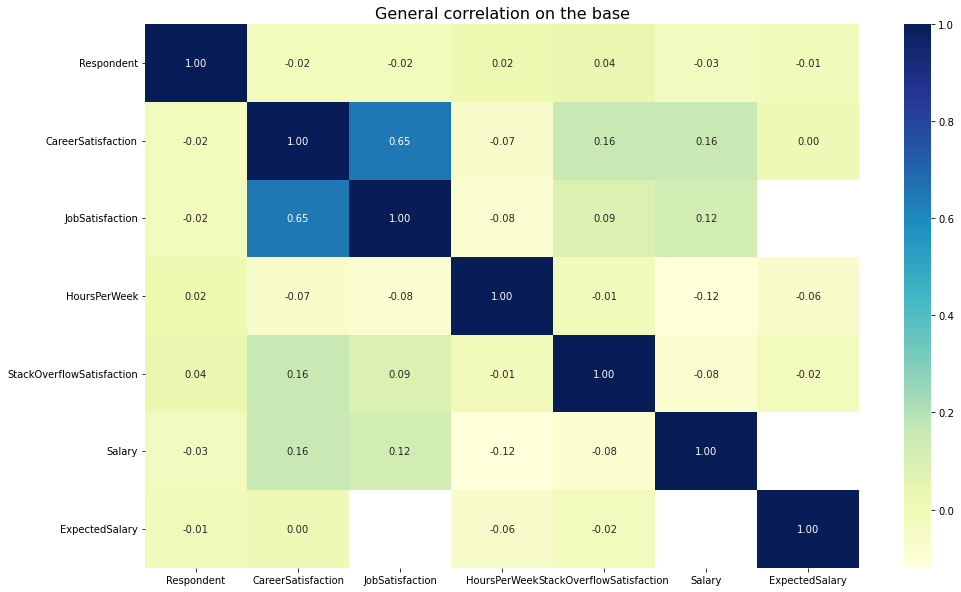

In [10]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('General correlation on the base', size = 16)
plt.show()

### Preparation of the data to analyze

In [11]:
df.Country.unique()

array(['United States', 'United Kingdom', 'Switzerland', 'New Zealand',
       'Poland', 'Colombia', 'France', 'Canada', 'Germany', 'Greece',
       'Brazil', 'Israel', 'Italy', 'Belgium', 'India', 'Chile',
       'Croatia', 'Argentina', 'Netherlands', 'Denmark', 'Ukraine',
       'Sri Lanka', 'Malaysia', 'Finland', 'Turkey', 'Spain', 'Austria',
       'Mexico', 'Russian Federation', 'Bulgaria', 'Uruguay', 'Estonia',
       'Iran', 'Bangladesh', 'Sweden', 'Lithuania', 'Paraguay', 'Romania',
       'Costa Rica', 'Serbia', 'Slovenia', 'United Arab Emirates',
       'Tunisia', 'Kenya', 'El Salvador', 'Norway', 'Dominican Republic',
       'Belarus', 'Portugal', 'Czech Republic', 'Albania',
       'I prefer not to say', 'South Africa', 'Uzbekistan', 'Moldavia',
       'Ireland', 'Nepal', 'Pakistan', 'Slovak Republic', 'Hungary',
       'Egypt', 'Australia', 'Japan', 'South Korea', 'Rwanda',
       'Luxembourg', 'Kazakhstan', 'Bolivia', 'Vietnam', 'Somalia',
       'Saudi Arabia', 'Ethiopia

In [12]:
# We select only countries of interest
Latam = ['Colombia', 'Brazil','Chile', 'Argentina','Mexico','Uruguay', 'Paraguay', 'Costa Rica',
          'El Salvador', 'Bolivia', 'Nicaragua', 'Cuba', 'Ecuador', 'Peru', 'Guatemala', 'Puerto Rico', 'Venezuela','Panama','French Guyana','Honduras']

#Add a new catagory seperating to Latam and Global
df['Location'] = df['Country'].apply(lambda x: 'Latam' if x in Latam else 'Global')

In [13]:
df.Location.unique()

array(['Global', 'Latam'], dtype=object)

In [14]:
def no_null_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    same df but the data numeric columns with nulls will be fill with the median value for the same column
    '''
    # Drop missing salary
    df = df.dropna(subset=['Salary'], axis=0)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].median()), inplace=True)

    return df

In [15]:
df = no_null_data(df)

### Starting looking for answers

Text(0.5, 1.0, 'Representation of Latam in the Survey')

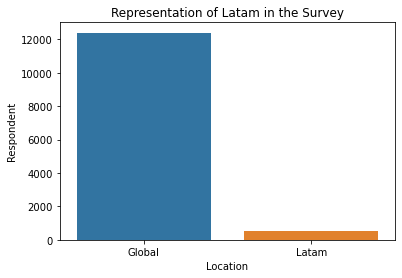

In [16]:
# Latam representation in the survey
df_plot = df.groupby(['Location'])['Respondent'].count().reset_index()

sns.barplot(x='Location', y='Respondent', data=df_plot)
plt.title('Representation of Latam in the Survey')

Text(0.5, 1.0, 'Latam Most Representation Country')

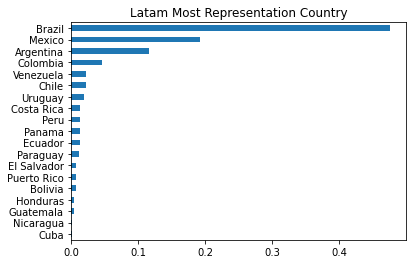

In [17]:
# Latam most representation country
ax = (df[df['Location']=='Latam'].Country.value_counts()/df[df['Location']=='Latam'].shape[0]).plot(kind='barh')
ax.invert_yaxis()
plt.title('Latam Most Representation Country')

#### 1. What programming languages are most used to work in Latam?

Text(0.5, 1.0, 'Top 10 Most Representative Languages in Latam')

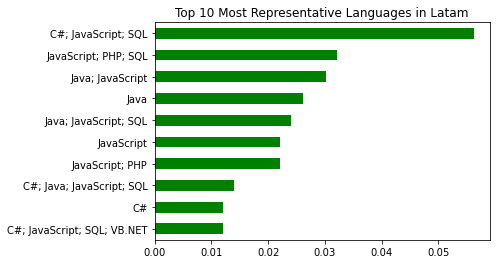

In [18]:
#  Latam top 10 most representative languages by developers
ax = (df[df['Location']=='Latam'].HaveWorkedLanguage.value_counts()[:10]/df[df['Location']=='Latam'].shape[0]).plot(kind="barh", color='Green')
ax.invert_yaxis()
plt.title('Top 10 Most Representative Languages in Latam')

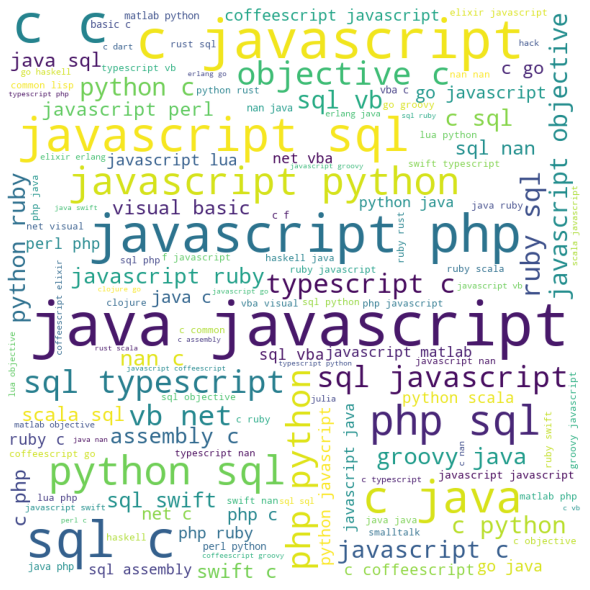

In [19]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.HaveWorkedLanguage:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = re.split('; |, ', val)
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += ' '.join(tokens)+' '
 
wordcloud = WordCloud(width = 800,
                      height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### 2. What are most wanted programming language in Latam?

Text(0.5, 1.0, 'Top 10 Most Representative Want languages in Latam')

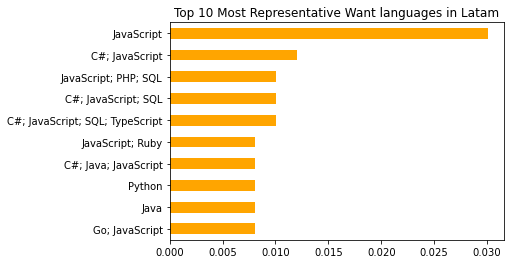

In [20]:
#  Latam top 10 most representative Want languages
ax = (df[df['Location']=='Latam'].WantWorkLanguage.value_counts()[:10]/df[df['Location']=='Latam'].shape[0]).plot(kind='barh', color='Orange')
ax.invert_yaxis()
plt.title('Top 10 Most Representative Want languages in Latam')

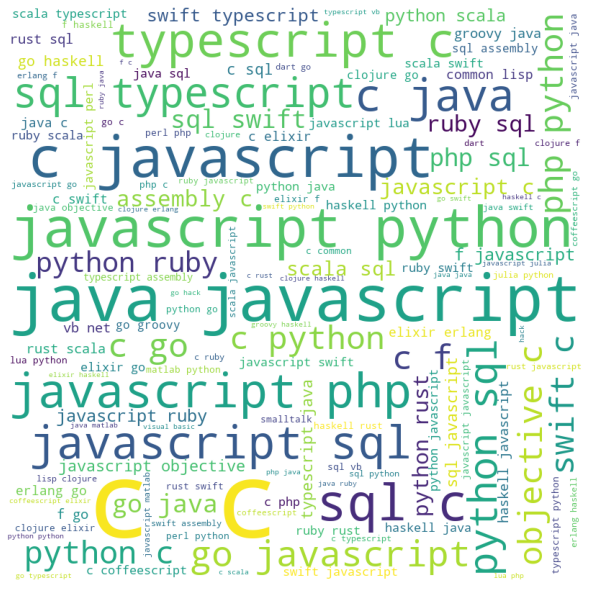

In [21]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.WantWorkLanguage.dropna():
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = re.split('; |, ', val)
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += ' '.join(tokens)+' '
 
wordcloud = WordCloud(width = 800,
                      height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

#### 3. Which occupations were most popular in Latam?

In [22]:
occ_df = df[df['Location']=='Latam'].groupby(['DeveloperType'])['Respondent'].count().reset_index()
occ_df.sort_values(by='Respondent', ascending=False, inplace=True)

In [23]:
occ_df

,DeveloperType,Respondent
38,Web developer,148
95,Web developer; Mobile developer,32
52,Web developer; Desktop applications developer,31
28,Mobile developer,21
103,Web developer; Mobile developer; Desktop appli...,15
...,...,...
55,Web developer; Desktop applications developer;...,1
51,Web developer; Database administrator; Systems...,1
47,Web developer; Database administrator; Other,1
44,Web developer; Data scientist; Systems adminis...,1


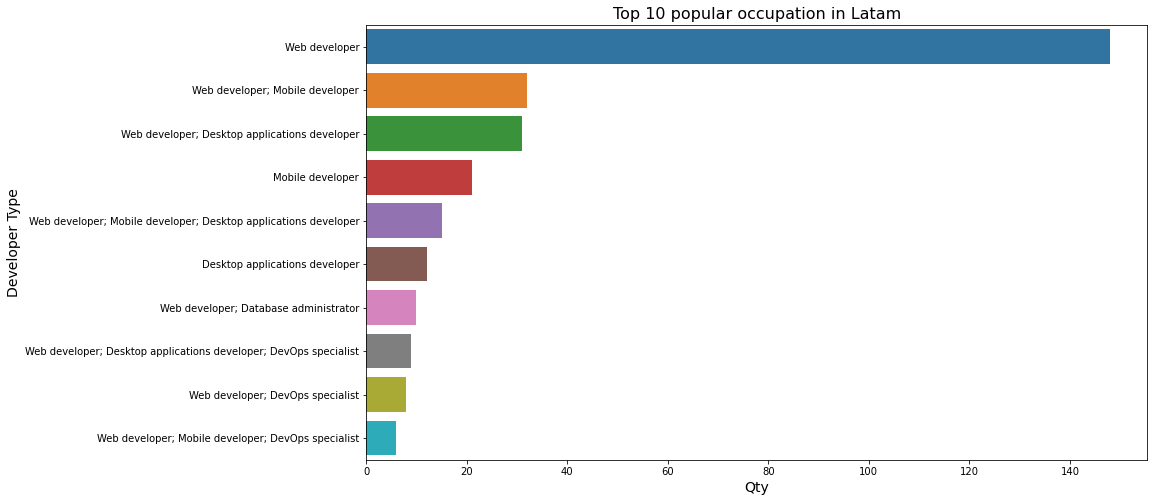

In [24]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Respondent',
            y = 'DeveloperType',
            data = occ_df[:10])

plt.xlabel('Qty', fontsize = 14)
plt.ylabel('Developer Type', fontsize = 14)
plt.title('Top 10 popular occupation in Latam', size = 16)
plt.show()

#### 4. Which Latam Country has the highest career satisfaction percentage?

In [25]:
cs_df = df[df['Location']=='Latam'].groupby(['Country'])['CareerSatisfaction'].sum().reset_index()
cs_df['Percent'] = round(cs_df['CareerSatisfaction']/df[df['Location']=='Latam'].CareerSatisfaction.sum()*100,2)
cs_df.sort_values(by='CareerSatisfaction', ascending=False, inplace=True)
cs_df

,Country,CareerSatisfaction,Percent
2,Brazil,1761.0,45.39
11,Mexico,797.0,20.54
0,Argentina,441.0,11.37
4,Colombia,211.0,5.44
18,Venezuela,90.0,2.32
3,Chile,81.0,2.09
17,Uruguay,75.0,1.93
7,Ecuador,62.0,1.60
15,Peru,60.0,1.55
13,Panama,59.0,1.52


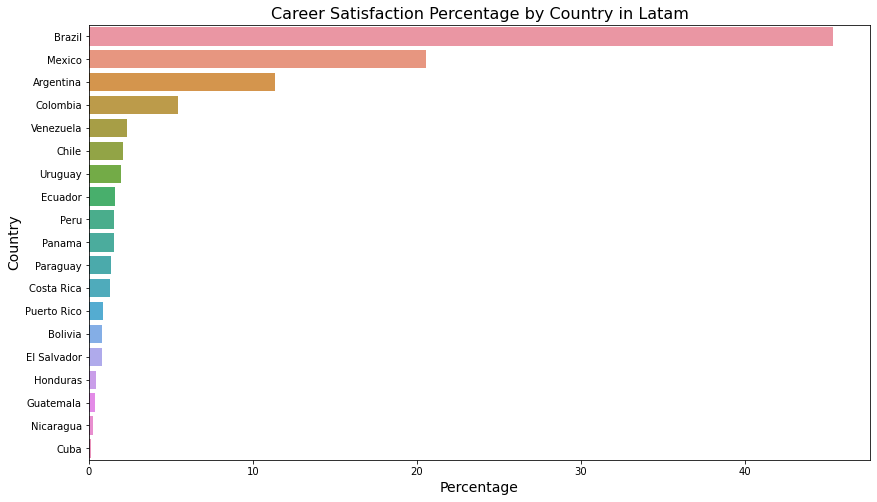

In [26]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Percent',
            y = 'Country',
            data = cs_df)

plt.xlabel('Percentage', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.title('Career Satisfaction Percentage by Country in Latam', size = 16)
plt.show()

#### 5. Which Latam location has the highest salary mean?

In [27]:
# First some look in the Salary variable by contry, just for fun ;)
df_salary = df[(df['Location']=='Latam') & (df.Salary > 6000) & (df.Salary < 30000)]
df_salary.Salary.describe()

count      281.000000
mean     16493.625874
std       6424.592899
min       6114.649682
25%      11146.496815
50%      15789.473684
75%      21605.095541
max      29948.058835
Name: Salary, dtype: float64

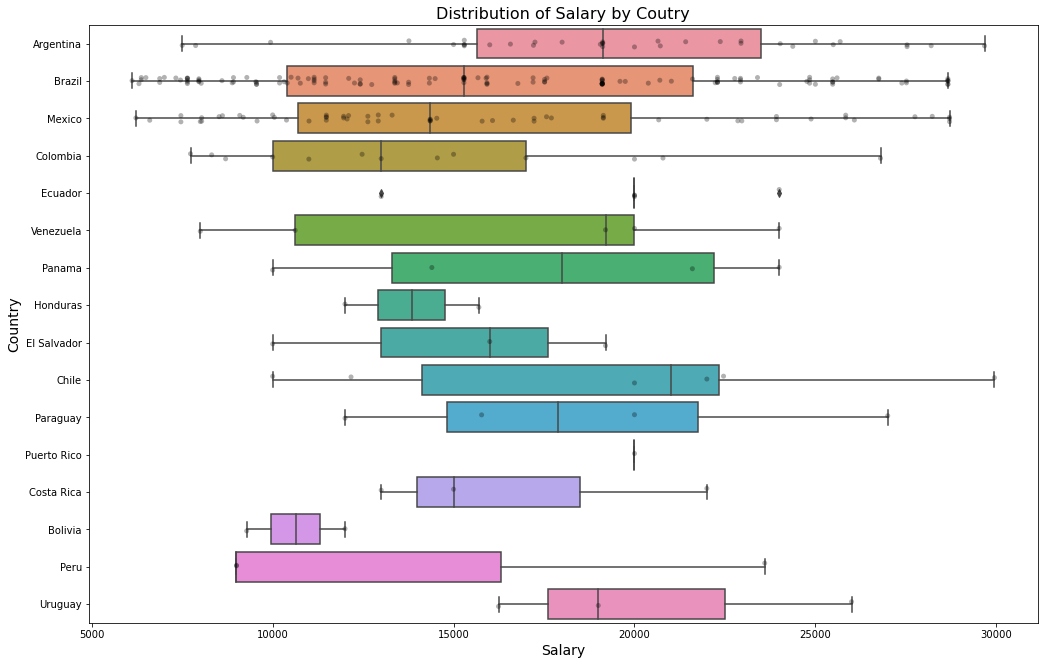

In [28]:
plt.figure(figsize=(17,11))
boxplot = sns.boxplot(data=df_salary, x='Salary', y='Country')
boxplot = sns.stripplot(x='Salary', y='Country', data=df_salary, marker="o", alpha=0.3, color="black")
boxplot.axes.set_title('Distribution of Salary by Coutry', fontsize=16)
boxplot.set_xlabel('Salary', fontsize=14)
boxplot.set_ylabel('Country', fontsize=14)
plt.show()

In [29]:
salary = df_salary.groupby(['Country'])['Salary'].mean().reset_index()
salary.sort_values(by='Salary', ascending=False, inplace=True)

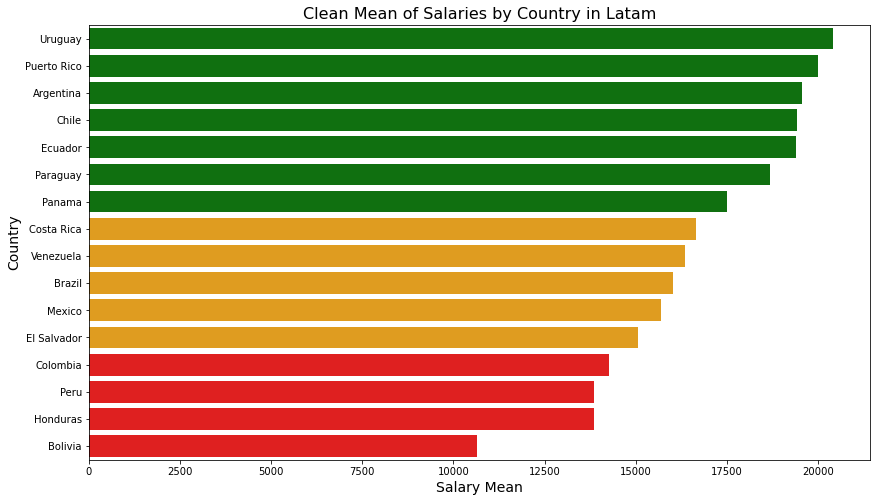

In [30]:
plt.figure(figsize=(14,8))

clrs = ['red' if (x < 15000) else ('orange' if (x < 17000) else 'green') for x in salary.Salary]

sns.barplot(x = 'Salary',
            y = 'Country',
            data = salary,
            palette=clrs) # color=clrs)

plt.xlabel('Salary Mean', fontsize = 14)
plt.ylabel('Country', fontsize = 14)
plt.title('Clean Mean of Salaries by Country in Latam', size = 16)
plt.show()

#### 6. Which Latam location has the highest salary growth?

In [42]:
years = {'Less than a year' : 0,
            '1 to 2 years' : 1, 
            '2 to 3 years' : 2,
            '3 to 4 years' : 3, 
            '4 to 5 years' : 4, 
            '5 to 6 years' : 5, 
            '6 to 7 years' : 6, 
            '7 to 8 years' : 7, 
            '8 to 9 years' : 8, 
            '9 to 10 years' : 9, 
            '10 to 11 years' : 10, 
            '11 to 12 years' : 11, 
            '12 to 13 years' : 12,
            '13 to 14 years' : 13, 
            '14 to 15 years' : 14, 
            '15 to 16 years' : 15, 
            '16 to 17 years' : 16,
            '17 to 18 years' : 17, 
            '18 to 19 years' : 18, 
            '19 to 20 years' : 19, 
            '20 or more years' : 20,
            np.nan : -1}

dfL = df.reset_index()
dfL['YearsExp'] = dfL['YearsCodedJob'].apply(lambda x: years[x])
dfL['YearsExp'] = pd.to_numeric(dfL['YearsExp'])

# We erase the points with -1 since they were the placeholders for -1
dfL = dfL[dfL['YearsExp'] != -1]

In [43]:
sg_df = dfL.groupby(['YearsExp'])['Salary'].mean().reset_index()
sg_df.sort_values(by='YearsExp', ascending=False, inplace=True)

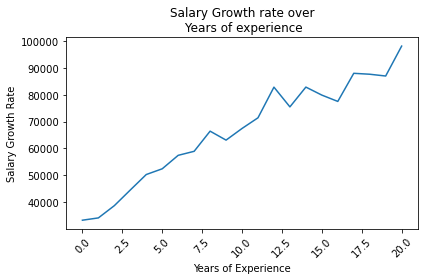

In [44]:
ax = sns.lineplot(x='YearsExp', y='Salary', data=sg_df)
plt.title('Salary Growth rate over\n Years of experience')
plt.ylabel('Salary Growth Rate')
plt.xlabel('Years of Experience')
plt.xticks(rotation=45)
plt.tight_layout()

In [46]:
sg_df = dfL.groupby(['Location','YearsExp'])['Salary'].mean().reset_index()
sg_df = sg_df[sg_df['YearsExp'] != 0]

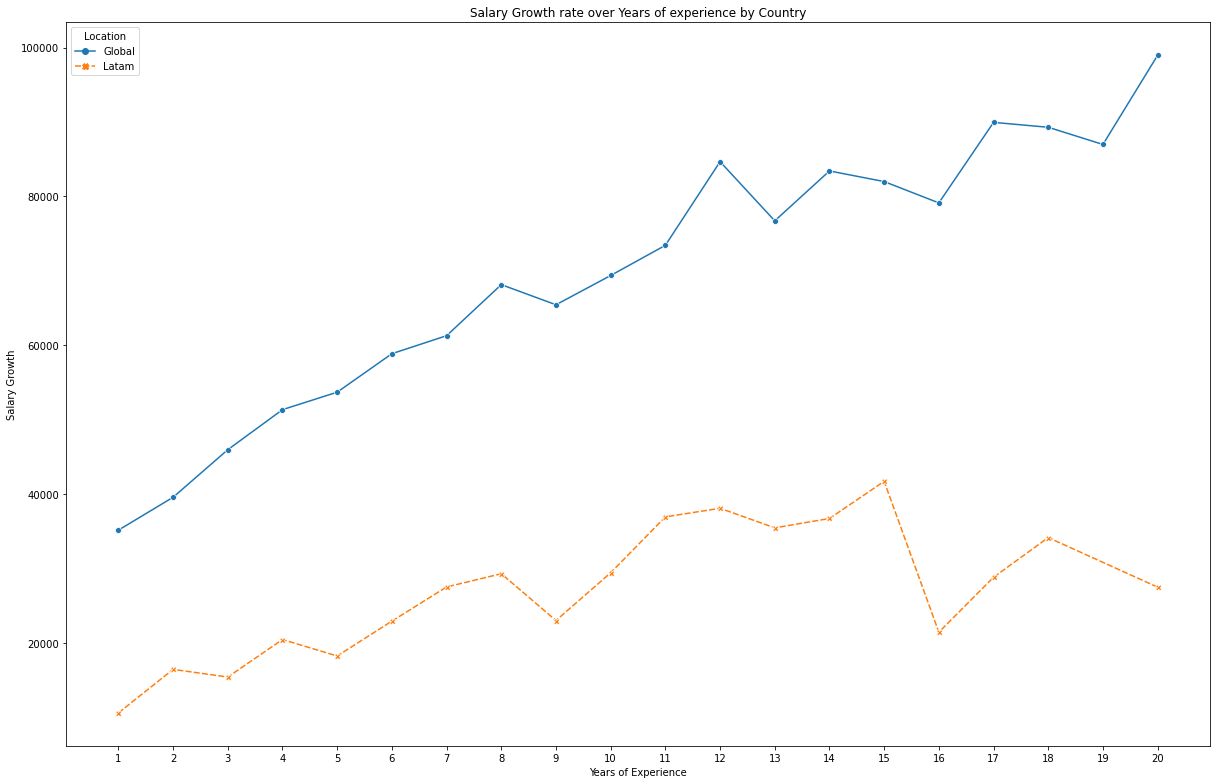

In [47]:
plt.figure(figsize=(17,11))
ax = sns.lineplot(x='YearsExp', y='Salary', hue='Location', ci=None, marker='o', markers=True, style='Location', data=sg_df)
ax.set_xticks(range(1, 21, 1))
plt.title('Salary Growth rate over Years of experience by Country')
plt.ylabel('Salary Growth')
plt.xlabel('Years of Experience')
plt.tight_layout()